<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/class_simpleNN_churn_modeling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 12th Nov, 2022
# **********************************************************
# BETTER SEE THE OTHER FILE: simpleNN churn_prediction.ipynb
#***********************************************************
# Bank churn modeling dataset
# Experiments with NN
# https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

In [1]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 2.1 Read Bank Customers churn data

path = "/gdrive/MyDrive/deeplearning/"


In [5]:
# 2.2
data = pd.read_csv(path + "churn_modelling.csv")

In [6]:
# 2.2.1
data.head()

,rowNumber,customerId,surname,creditScore,geography,gender,age,tenure,balance,numOfProducts,hasCrCard,isActiveMember,estimatedSalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# 2.2.2
data.shape   # (10000, 14)

(10000, 14)

In [9]:
# 2.3 Pop out target
y = data.pop('exited')

In [10]:
# 2.3.1
data.shape   # (10000,13)

(10000, 13)

In [11]:
# 3.0 Check NULL
data.isnull().sum()

rowNumber          0
customerId         0
surname            0
creditScore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numOfProducts      0
hasCrCard          0
isActiveMember     0
estimatedSalary    0
dtype: int64

In [13]:
data['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data['geography'].nunique()

3

In [16]:
data['gender'] = data['gender'].map({'Female' : 1, 'Male' : 0})

In [17]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
data['geography'] = data['geography'].map({'France' : 0, 'Spain' : 1, 'Germany' : 2})

In [19]:
# 3.2 Categorical features:
data[:2]

,rowNumber,customerId,surname,creditScore,geography,gender,age,tenure,balance,numOfProducts,hasCrCard,isActiveMember,estimatedSalary
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58


In [20]:
data = data.drop(columns = ['rowNumber','customerId', 'surname'])

In [21]:
data['tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [22]:
X_train,X_test, y_train,y_test = train_test_split(data,
                                                  y,
                                                  test_size = 0.25)

In [23]:
X_train.shape
X_test.shape

(7500, 10)

(2500, 10)

In [24]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [25]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Model

1. Input layer  --10 neurons  
2. Hidden layer-- 90 neurons, activation: sigmoid
3. Hidden layer-- 500 neurons activation: relu
4. Hidden layer-- 50 neurons activaton: relu
5. Output layer --1 neuron sigmoid



In [26]:
# 6.0
model = tf.keras.Sequential()

In [27]:
# 6.1
model.add( tf.keras.layers.Input(shape = (10,) ))

In [28]:
# 6.2 Start
model.add(tf.keras.layers.Dense(40, activation = 'relu'))  # MAke it 5 and then 20 (not more or less)

In [29]:
# 6.2.1 Experiment with adding a dropout layer
#       but then increase number of units in Dense layer from 20 to 40
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [30]:
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [31]:
model.add(tf.keras.layers.Dense(10, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [33]:
# 6.3 Experiment first with activation of sigmoid
#     and then no activation function
model.add(tf.keras.layers.Dense(1,
                                activation = 'sigmoid'
                                ))    # Keep sigmoid; then remove sigmoid

In [34]:
# 6.4 Model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                440       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [35]:
# 6.5 Compile model
#     Expt with adam
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [36]:
# 7.0
#
history1 = model.fit(X_train,y_train,
                    epochs = 70,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/70
235/235 [==============================] - 2s 4ms/step - loss: 0.4989 - acc: 0.8053 - val_loss: 0.5291 - val_acc: 0.7692
Epoch 2/70
235/235 [==============================] - 1s 5ms/step - loss: 0.4836 - acc: 0.8053 - val_loss: 0.5171 - val_acc: 0.7692
Epoch 3/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4750 - acc: 0.8053 - val_loss: 0.5110 - val_acc: 0.7692
Epoch 4/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4688 - acc: 0.8053 - val_loss: 0.5073 - val_acc: 0.7692
Epoch 5/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4644 - acc: 0.8053 - val_loss: 0.4971 - val_acc: 0.7692
Epoch 6/70
235/235 [==============================] - 1s 5ms/step - loss: 0.4588 - acc: 0.8053 - val_loss: 0.4911 - val_acc: 0.7692
Epoch 7/70
235/235 [==============================] - 1s 5ms/step - loss: 0.4537 - acc: 0.8053 - val_loss: 0.4879 - val_acc: 0.7692
Epoch 8/70
235/235 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
# 7.1
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3359 - acc: 0.8700


[0.3358922302722931, 0.8700000047683716]

In [ ]:
type(history.history)

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

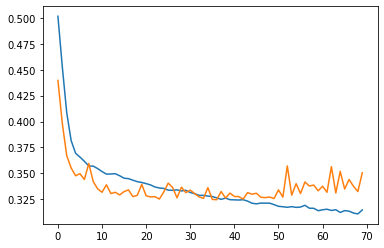

In [ ]:
# Plot without dropouts
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

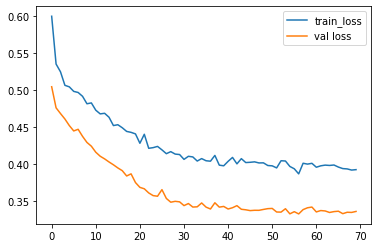

In [ ]:
# plot with dropouts
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

In [ ]:
######################### I am done #################